In [1]:
#import tensorflow as tf
#tf.config.set_visible_devices([], "GPU")

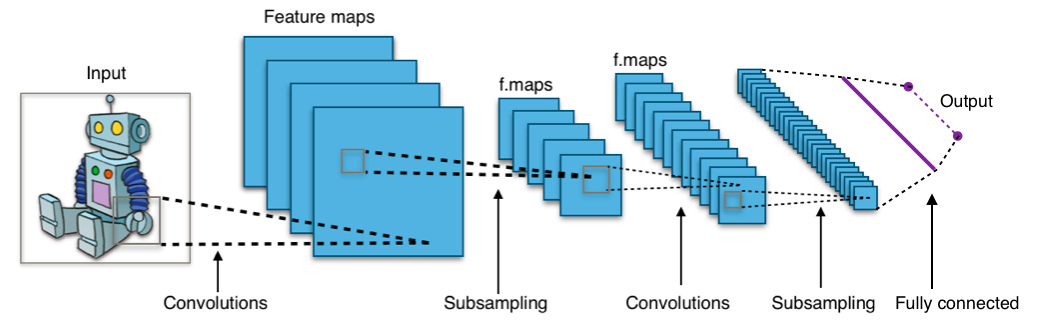

In [5]:
from keras.regularizers import L2
from keras.optimizers import SGD, Adam, RMSprop, AdamW
from sklearn.metrics import classification_report, confusion_matrix
from IPython.display import Image
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Input, Dense, Flatten, Activation, AveragePooling2D, Conv2D, MaxPooling2D
from keras.layers import Flatten, Reshape, Dropout
from keras.utils import to_categorical, plot_model, set_random_seed

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

Image(filename='Typical_cnn.png')
# Source: https://en.wikipedia.org/wiki/Convolutional_neural_network#/media/File:Typical_cnn.png
# License: CC BY-SA 4.0 https://creativecommons.org/licenses/by-sa/4.0/

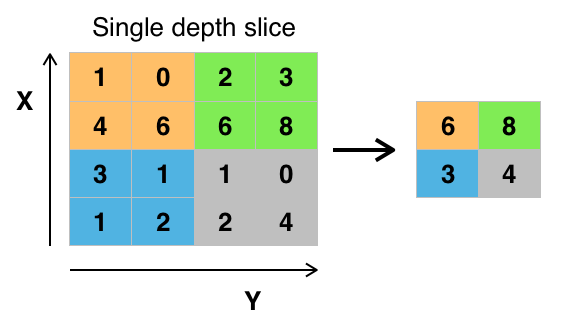

In [6]:
Image(filename='Max_pooling.png')
# Source: https://en.wikipedia.org/wiki/Convolutional_neural_network#/media/File:Max_pooling.png
# License: CC BY-SA 4.0 https://creativecommons.org/licenses/by-sa/4.0/

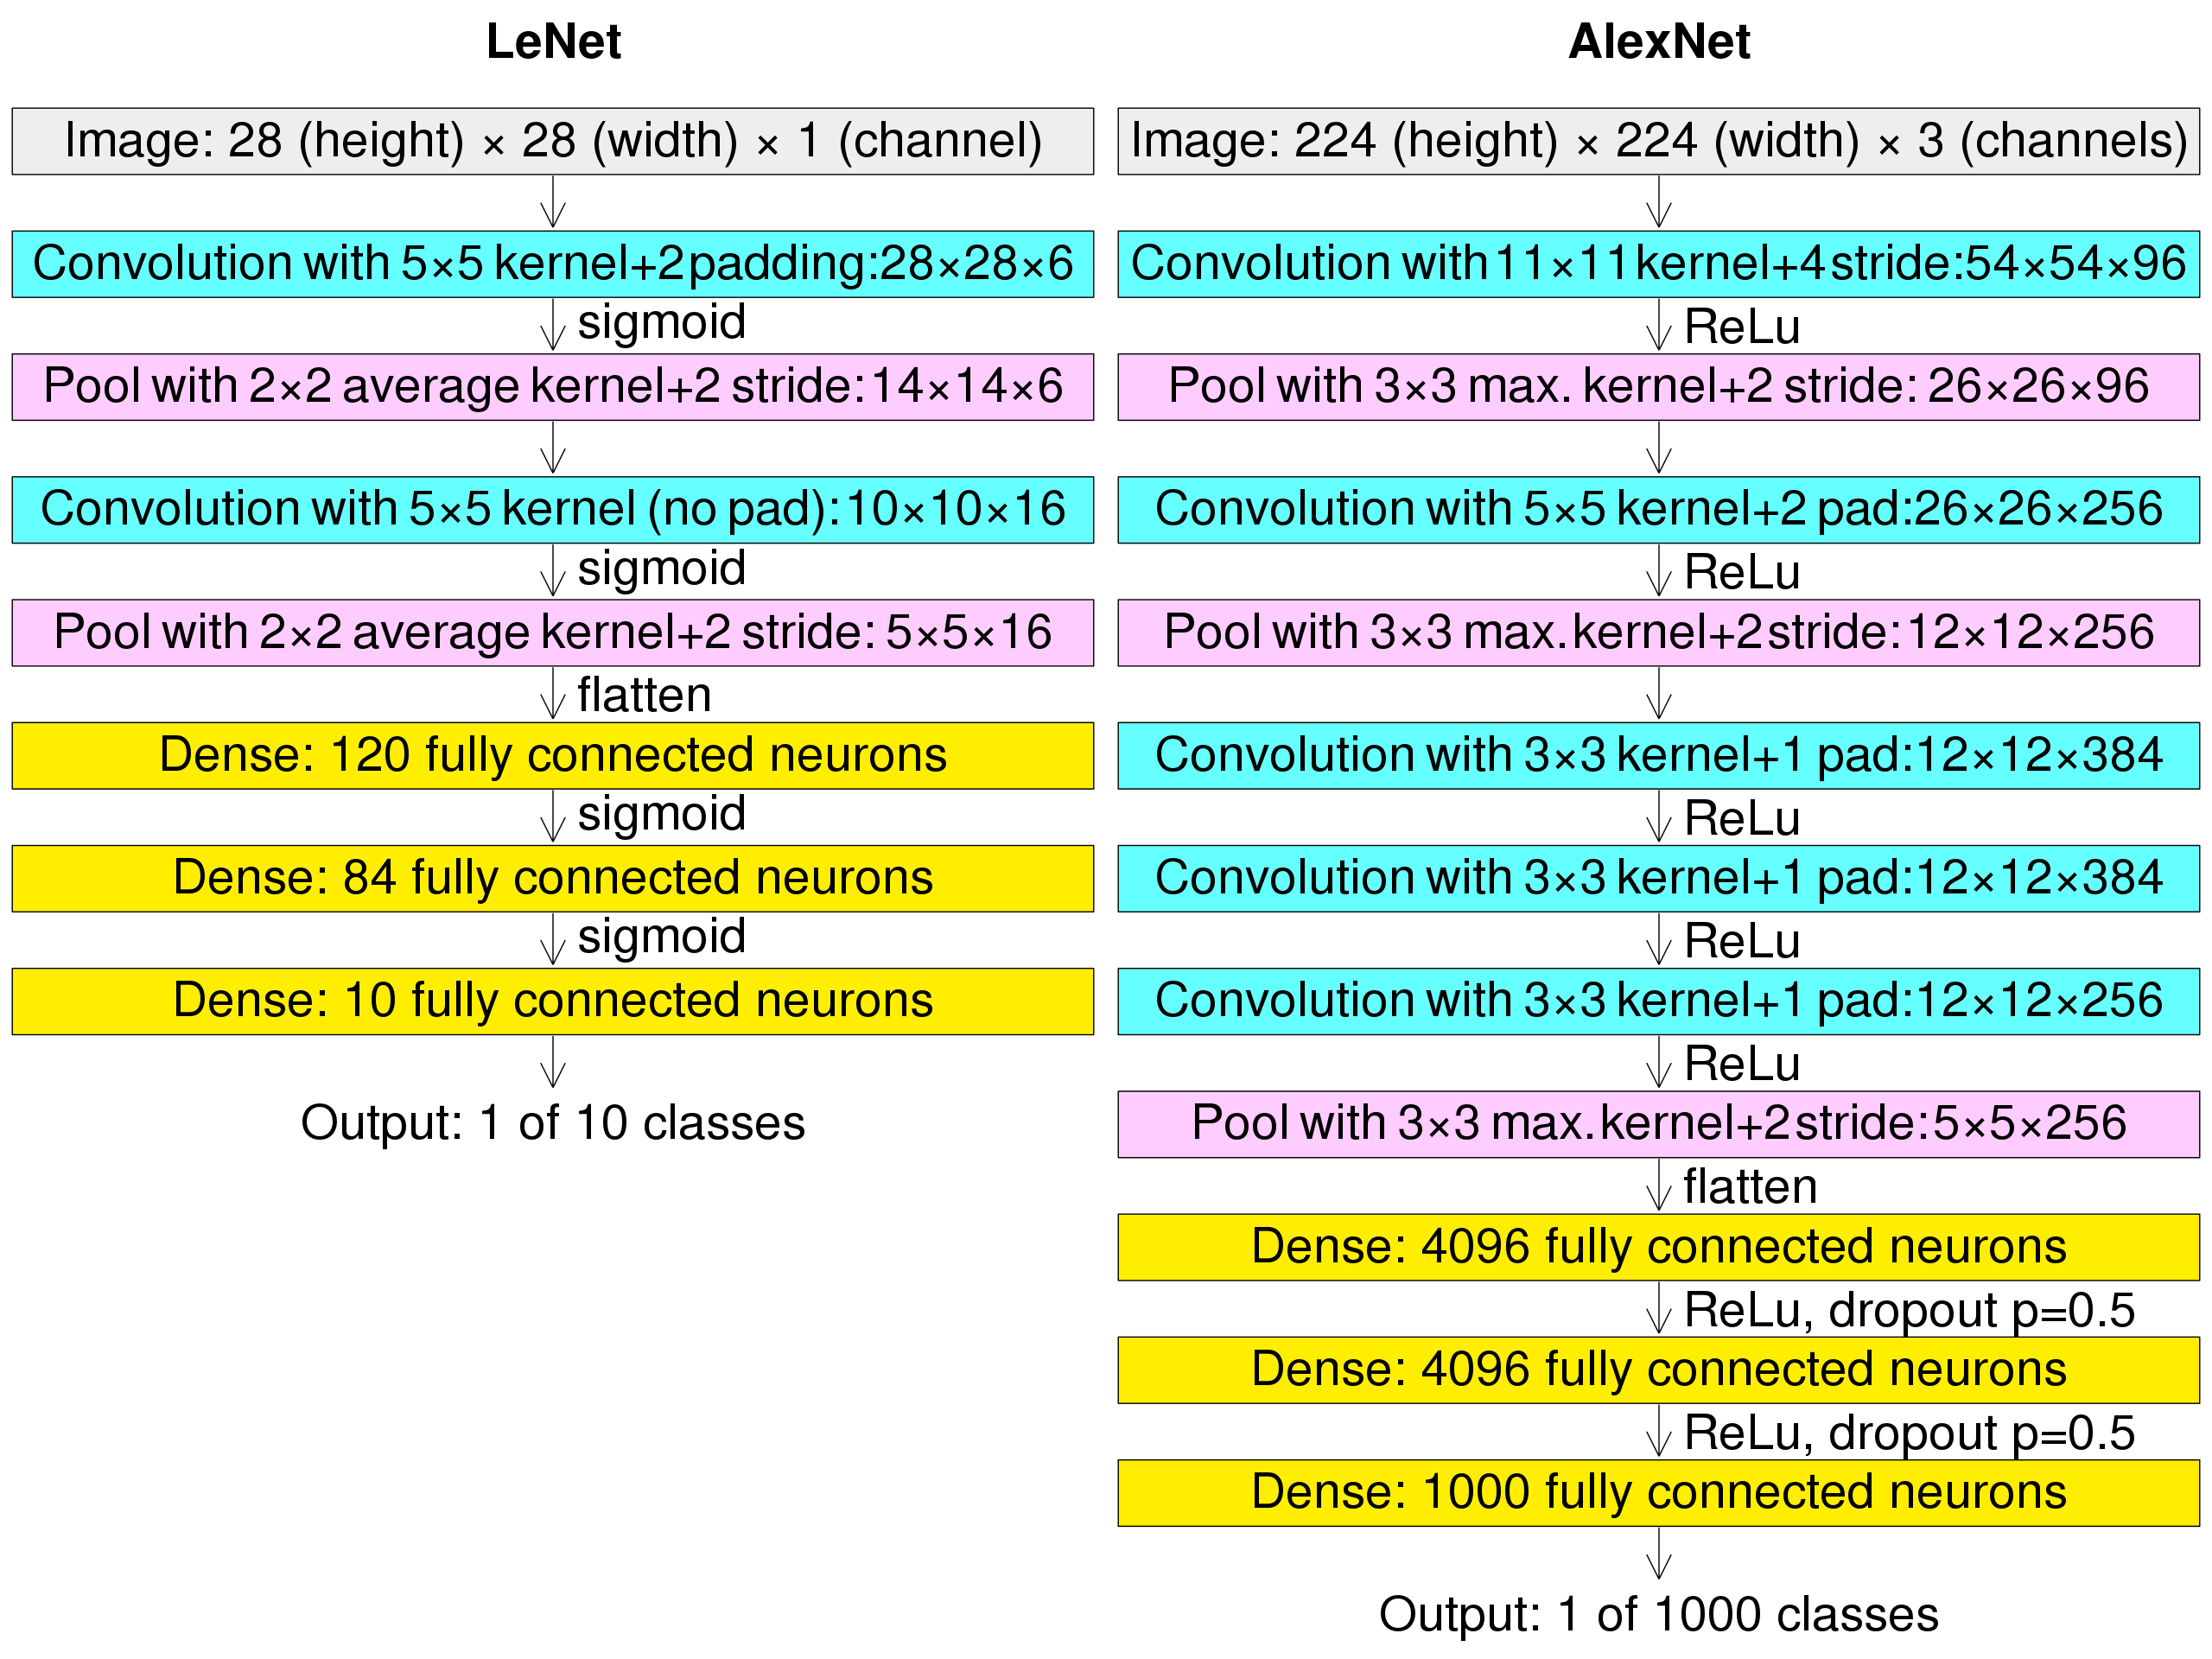

In [7]:
Image(filename='LeNets.png')
# Source: https://en.wikipedia.org/wiki/LeNet#/media/File:Comparison_image_neural_networks.svg
# License: CC BY-SA 4.0 https://creativecommons.org/licenses/by-sa/4.0/

## MNIST is boring now, let's play with another dataset: CIFAR-10

The CIFAR-10 dataset consists of

- $60000$ $32x32$ colour images (RGB) in $10$ classes, with $6000$ images per class
- $50000$ training images
- $10000$ test images
- The classes:
 - airplane
 - automobile
 - bird
 - cat
 - deer
 - dog
 - frog
 - horse
 - ship
 - truck

In [9]:
#from tensorflow.keras.datasets import cifar10
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

print(X_train.shape, X_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


### Let's look at a few examples


Further interesting reading material from Andrej Karpathy (2014), former Director of AI at Tesla

http://karpathy.github.io/2011/04/27/manually-classifying-cifar10/

http://karpathy.github.io/2014/09/02/what-i-learned-from-competing-against-a-convnet-on-imagenet/

### One-hot encoding of the labels and **scaling** (don't forget it!) of the matrices

## Let's train a simple CNN model

- Input shape is $32\times32\times3$
- Use 32 filters with kernel size $5\times 5$, `relu` activation and `same` padding
- MaxPooling with $2\times2$ pool size
- Flatten
- Dense layer with 128 neurons, `relu` activation
- Dense layer with 10 neurons, `softmax` activation
- Use some Dropout layers inbetween the dense layers
- Let's experiment with the different optimizers, SGD, Adam, RMSprop 

In [10]:
model = Sequential()



## Extract the loss curves from the training process without Tensorboard

We can save the training history from `train = model.fit(...)` and access the loss values via `train.history`

## Plot the loss/accuracy curves

In [11]:
def plot_train_history(train):
    return

## Early stopping 

We can automatically detect the plateau phase by using `Early stopping` callbacks, where we can specify parameters such as
- the metrics to monitor
- the patience, i.e. how many epochs we need without improvement

This way we can set a higher epoch number, the training will stop when there is no significant improvement in the loss, we don't have to worry too much about overfitting.

In [12]:
from tensorflow.keras.callbacks import EarlyStopping



## ModelCheckpoint

ModelCheckpoint callbacks can be used to save intermediate models, or every model or just the best models based on a metric.

In [13]:
from tensorflow.keras.callbacks import ModelCheckpoint



In [14]:
from keras.models import load_model


## Experiments with deeper CNNs

Let's follow some configurations from the 2015 article [Very Deep Convolutional Networks for Large-Scale Image Recognition](https://arxiv.org/abs/1409.1556), (Table 1).



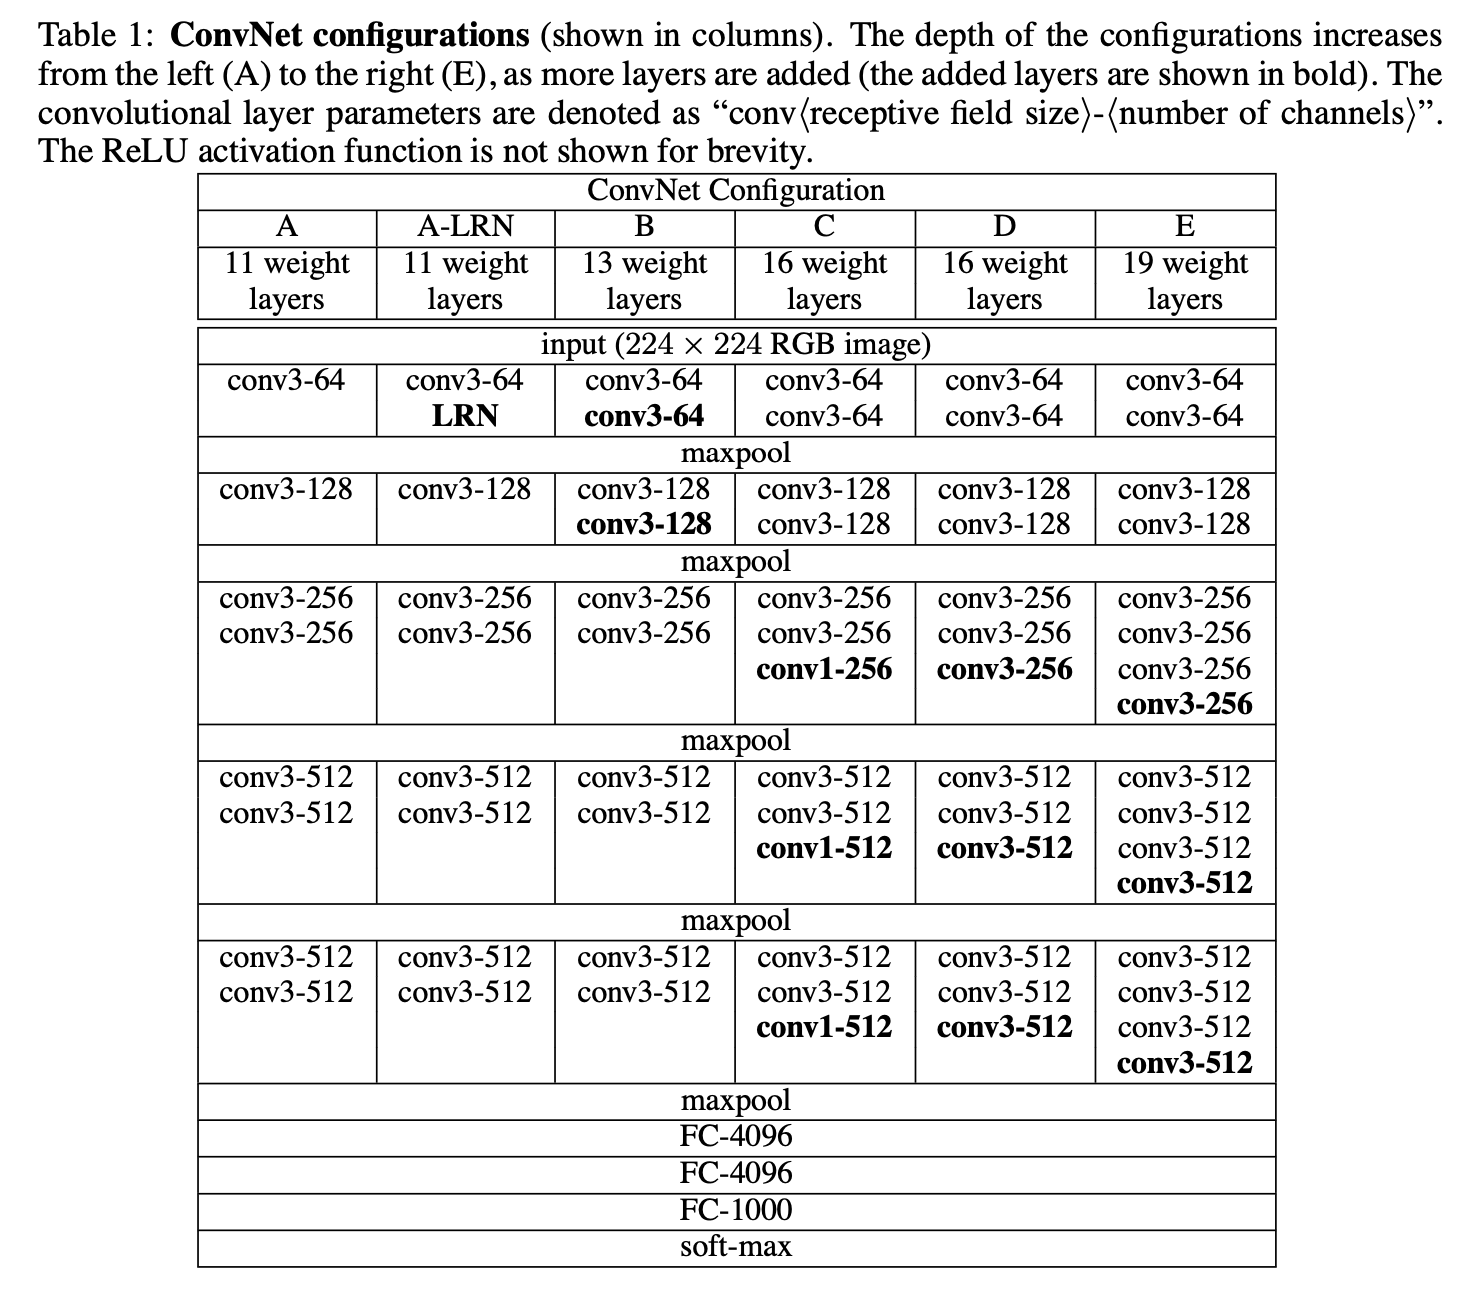

In [15]:
Image("VGG_architecture.png")

## Improving the model with further Dropout



## Another technique to improve the performance - Batch Normalization

[Batch normalization: Accelerating deep network training by reducing internal covariate shift (2015)](https://arxiv.org/abs/1502.03167) by Ioffe and Szegedy

The main idea of Batch normalization is to keep the activations around 0 with a variance of 1. This way we can avoid the vanishing gradient phenomenom during the training phase. Thus after every mini-batch we can apply BatchNormalization to normalize the activations. This has a lot of useful effects: we don't have to care too much about weight initialization, learning rate choices, etc.

In [16]:
from tensorflow.keras.layers import BatchNormalization



## Data augmentations

We can apply small random changes to the images during every epoch, such as vertical/horizontal shifting, small rotations, reflections, etc. This way the model will generalize much better because cannot 'memorize' the training images.

For the sake of simplicity this time we use the full test set as validation data.

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(width_shift_range=0.1, 
                             height_shift_range=0.1, 
                             horizontal_flip=True)

batch_size = 128
#train_flow = datagen.flow(X_train, y_train_encoded, batch_size=batch_size, shuffle=True)


## Let's see our best model's performance on a totally new image

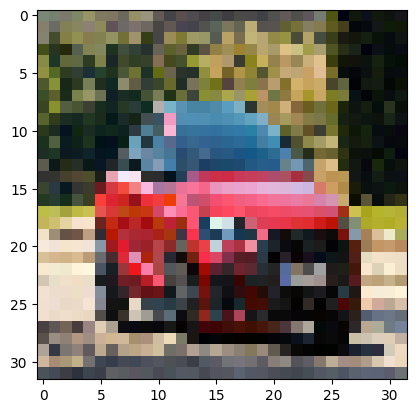

In [19]:
from keras.preprocessing.image import load_img, img_to_array

img = load_img('audi.png', target_size=(32, 32))
img = (img_to_array(img) / 255).reshape(1, 32, 32, 3)
plt.imshow(img[0])